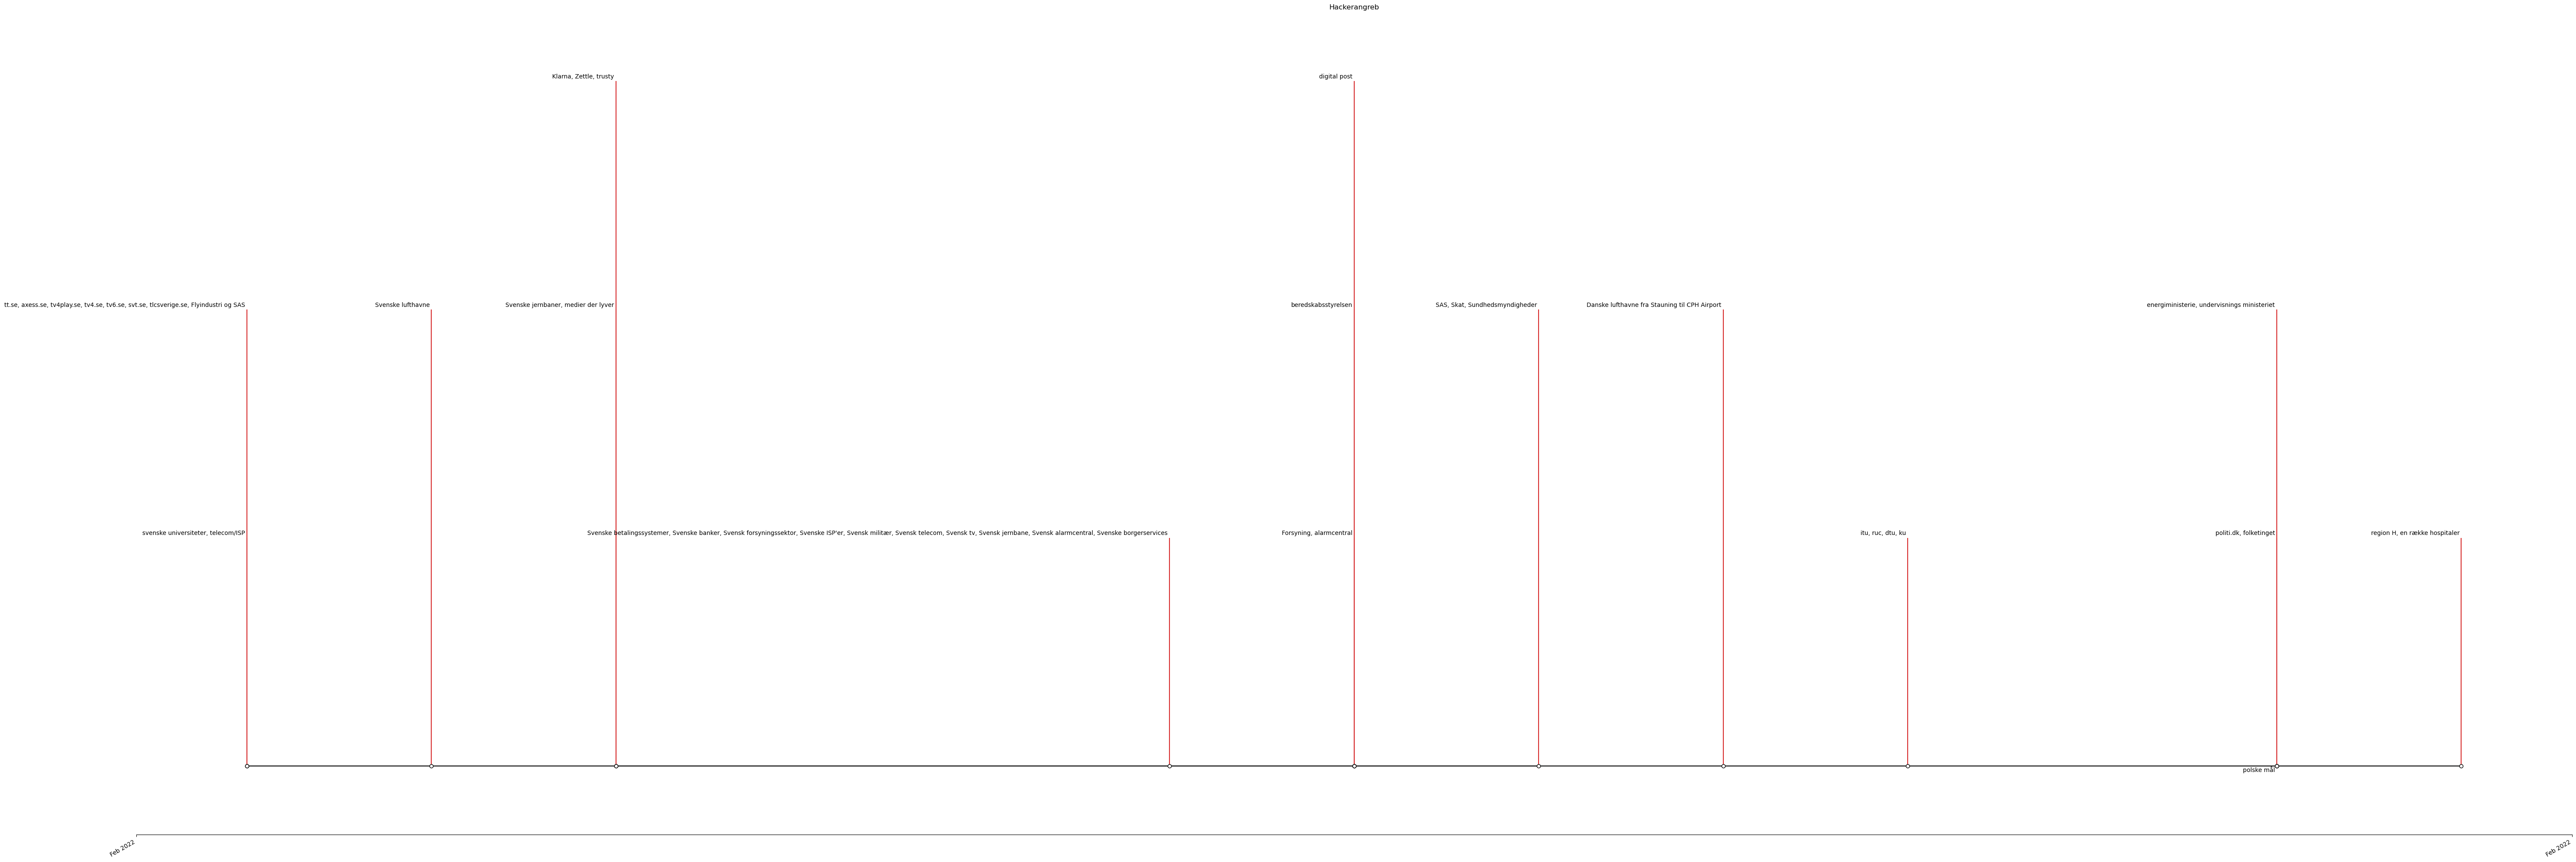

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

fid = open("Attacks.txt", 'r')

raw_data = fid.read()

fid.close()

data = str.split(raw_data, "\n")

attacks = {}

for d in data[1:]:
    point = str.split(d, ", ")
    date = point[0]
    name = point[1]
    severity = int(point[2])
    attacks[name] = (date, severity)

#Severity scale: 0 = no impact, 1 = aesthetic impact only , 2 = some core services down , 3 = all core services down
#attacks = {"tt.se": ("14-2-2022", 2), "Svenske universiteter": ("14-2-2022", 1), "axess.se": ("14-2-2022", 2)}


names = []
dateseverity = []

for key, value in attacks.items():
    if value not in dateseverity:
        names.append(key)
        dateseverity.append(value)
        continue
    else:
        idx = dateseverity.index(value)
        
        names[idx] = names[idx] + ", " + key

dates = []
severity = np.array([])

for i in dateseverity:
    dates.append(i[0])
    severity = np.append(severity, i[1])


# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(60, 20), layout="constrained")
ax.set(title="Hackerangreb")

dates = [datetime.strptime(d, "%d-%m-%Y") for d in dates]

ax.vlines(dates, 0, severity, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, severity, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

